In [3]:
!pip install monai

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from monai.apps import download_url, download_and_extract

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/campux/virtualenv/deeplearning-u20/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-35c2f63d1bd7>", line 1, in <module>
    from monai.apps import download_url, download_and_extract
  File "/homes/l18ollie/.local/lib/python3.8/site-packages/monai/__init__.py", line 36, in <module>
    from .utils.module import load_submodules  # noqa: E402
  File "/homes/l18ollie/.local/lib/python3.8/site-packages/monai/utils/__init__.py", line 15, in <module>
    from .deprecated import DeprecatedError, deprecated, deprecated_arg
  File "/homes/l18ollie/.local/lib/python3.8/site-packages/monai/utils/deprecated.py", line 18, in <module>
    from monai.utils.module import version_leq
  File "/homes/l18ollie/.local/lib/python3.8/site-packages/monai/utils/module.py", line 19, in <module>
    import torch
  File "/opt/campux/virtualenv/deeplearn

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/campux/virtualenv/deeplearning-u20/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-35c2f63d1bd7>", line 1, in <module>
    from monai.apps import download_url, download_and_extract
  File "/homes/l18ollie/.local/lib/python3.8/site-packages/monai/__init__.py", line 36, in <module>
    from .utils.module import load_submodules  # noqa: E402
  File "/homes/l18ollie/.local/lib/python3.8/site-packages/monai/utils/__init__.py", line 15, in <module>
    from .deprecated import DeprecatedError, deprecated, deprecated_arg
  File "/homes/l18ollie/.local/lib/python3.8/site-packages/monai/utils/deprecated.py", line 18, in <module>
    from monai.utils.module import version_leq
  File "/homes/l18ollie/.local/lib/python3.8/site-packages/monai/utils/module.py", line 19, in <module>
    import torch
  File "/opt/campux/virtualenv/deeplearn

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/campux/virtualenv/deeplearning-u20/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-35c2f63d1bd7>", line 1, in <module>
    from monai.apps import download_url, download_and_extract
  File "/homes/l18ollie/.local/lib/python3.8/site-packages/monai/__init__.py", line 36, in <module>
    from .utils.module import load_submodules  # noqa: E402
  File "/homes/l18ollie/.local/lib/python3.8/site-packages/monai/utils/__init__.py", line 15, in <module>
    from .deprecated import DeprecatedError, deprecated, deprecated_arg
  File "/homes/l18ollie/.local/lib/python3.8/site-packages/monai/utils/deprecated.py", line 18, in <module>
    from monai.utils.module import version_leq
  File "/homes/l18ollie/.local/lib/python3.8/site-packages/monai/utils/module.py", line 19, in <module>
    import torch
  File "/opt/campux/virtualenv/deeplearn

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil
import tempfile
import torch
from torch.nn import MSELoss
#from monai.apps import download_url, download_and_extract
from monai.config import print_config
from monai.data import DataLoader, Dataset, CacheDataset
from monai.losses import BendingEnergyLoss, MultiScaleLoss, DiceLoss
from monai.metrics import DiceMetric
from monai.networks.blocks import Warp
from monai.networks.nets import LocalNet
from monai.transforms import AddChanneld,Compose,LoadImaged,RandAffined,Resized,ScaleIntensityRanged,EnsureTyped
from monai.utils import set_determinism, first

print_config()


MONAI version: 0.7.0
Numpy version: 1.18.5
Pytorch version: 1.6.0
MONAI flags: HAS_EXT = False, USE_COMPILED = False
MONAI rev id: bfa054b9c3064628a21f4c35bbe3132964e91f43

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 3.2.1
scikit-image version: 0.16.2
Pillow version: 7.2.0
Tensorboard version: 2.3.0
gdown version: 4.2.0
TorchVision version: 0.7.0
tqdm version: 4.62.3
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.5.1
pandas version: 0.25.3
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



In [4]:
"""
Setup data directory

You can specify a directory with the MONAI_DATA_DIRECTORY environment variable. 
This allows you to save results and reuse downloads. 
If not specified a temporary directory will be used.
"""
directory = os.environ.get("MONAI_DATA_DIRECTORY")
root_dir = tempfile.mkdtemp() if directory is None else directory
print(root_dir)


/tmp/tmpe_dtw01m


In [5]:
#Set dataset path
train_size=50
val_size=25
test_size=25
data_dir="L2R_2021_Task3_test/mask/neurite-oasis.v1.0"
list_files=os.listdir(data_dir)
data_dicts = [
    {
        "fixed_image": os.path.join(data_dir,list_files[idx1],
                                    "aligned_norm.nii.gz"),
        "moving_image": os.path.join(data_dir,list_files[idx2],
                                    "aligned_norm.nii.gz"),
        "fixed_label": os.path.join(data_dir,list_files[idx1],
                                    "aligned_seg4.nii.gz"),
        "moving_label": os.path.join(data_dir,list_files[idx2],
                                    "aligned_seg4.nii.gz")
    }
    for idx1,idx2 in zip(np.array(range(1,train_size)),np.hstack((np.random.randint(1,train_size,train_size),
        np.random.randint(train_size,train_size+val_size,val_size))))
]

train_files, val_files = data_dicts[:train_size], data_dicts[train_size:train_size+val_size]



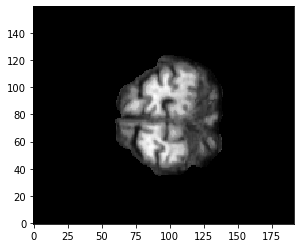

In [6]:
import nibabel as nib
data_dir="L2R_2021_Task3_test/mask/neurite-oasis.v1.0"

scan_brain=nib.load(os.path.join(data_dir,"OASIS_OAS1_0001_MR1/aligned_norm.nii.gz"))
scan_brain_data=scan_brain.get_fdata()
scan_seg=nib.load(os.path.join(data_dir,"OASIS_OAS1_0001_MR1/aligned_seg4.nii.gz"))
scan_seg_data=scan_seg.get_fdata()

from utils import show_slices
from utils import compute_dice



slices_brain=scan_brain_data[:,:,30]
slices_seg=scan_seg_data[:,:,30]
plt.imshow(slices_brain, cmap="gray",origin="lower")
plt.imshow(slices_seg, alpha=0.1,origin="lower",cmap="gray")

In [7]:
set_determinism(seed=0)

In [8]:
train_transforms = Compose(
    [
        LoadImaged(
            keys=["fixed_image", "moving_image", "fixed_label", "moving_label"]
        ),
        AddChanneld(
            keys=["fixed_image", "moving_image", "fixed_label", "moving_label"]
        ),
        #ScaleIntensityRanged(
         #   keys=["fixed_image", "moving_image"],
         #   a_min=-285, a_max=3770, b_min=0.0, b_max=1.0, clip=True,
        #),
        RandAffined(
            keys=["fixed_image", "moving_image", "fixed_label", "moving_label"],
            mode=('bilinear', 'bilinear', 'nearest', 'nearest'),
            prob=1.0, spatial_size=(160, 192, 224),
            rotate_range=(0, 0, np.pi / 15), scale_range=(0.1, 0.1, 0.1)
        ),
        Resized(
            keys=["fixed_image", "moving_image", "fixed_label", "moving_label"],
            mode=('trilinear', 'trilinear', 'nearest', 'nearest'),
            align_corners=(True, True, None, None),
            spatial_size=(160, 192, 224)
        ),
        EnsureTyped(
            keys=["fixed_image", "moving_image", "fixed_label", "moving_label"]
        )
    ]
)

val_transforms = Compose(
    [
        LoadImaged(
            keys=["fixed_image", "moving_image", "fixed_label", "moving_label"]
        ),
        AddChanneld(
            keys=["fixed_image", "moving_image", "fixed_label", "moving_label"]
        ),
        #ScaleIntensityRanged(
         #   keys=["fixed_image", "moving_image"],
          #  a_min=-285, a_max=3770, b_min=0.0, b_max=1.0,
          #  clip=True,
        #),
        Resized(
            keys=["fixed_image", "moving_image", "fixed_label", "moving_label"],
            mode=('trilinear', 'trilinear', 'nearest', 'nearest'),
            align_corners=(True, True, None, None),
            spatial_size=(160, 192, 224)
        ),
        EnsureTyped(
            keys=["fixed_image", "moving_image", "fixed_label", "moving_label"]
        ),
    ]
)


moving_image shape: torch.Size([192, 160, 224]), moving_label shape: torch.Size([192, 160, 224])
fixed_image shape: torch.Size([192, 160, 224]), fixed_label shape: torch.Size([192, 160, 224])


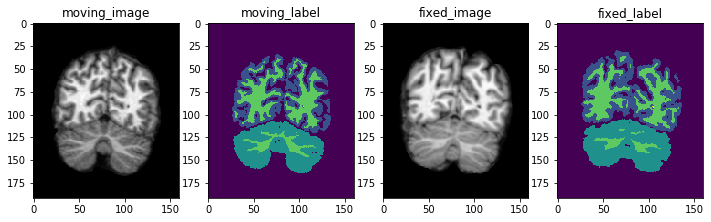

In [9]:


check_ds = Dataset(data=train_files, transform=train_transforms)
check_loader = DataLoader(check_ds, batch_size=1)
check_data = first(check_loader)
fixed_image = check_data["fixed_image"][0][0].permute(1, 0, 2)
fixed_label = check_data["fixed_label"][0][0].permute(1, 0, 2)
moving_image = check_data["moving_image"][0][0].permute(1, 0, 2)
moving_label = check_data["moving_label"][0][0].permute(1, 0, 2)

print(f"moving_image shape: {moving_image.shape}, "
      f"moving_label shape: {moving_label.shape}")
print(f"fixed_image shape: {fixed_image.shape}, "
      f"fixed_label shape: {fixed_label.shape}")

# plot the slice [:, :, 50]
plt.figure("check", (12, 6))
plt.subplot(1, 4, 1)
plt.title("moving_image")
plt.imshow(moving_image[:, :, 50], cmap="gray")
plt.subplot(1, 4, 2)
plt.title("moving_label")
plt.imshow(moving_label[:, :, 50])
plt.subplot(1, 4, 3)
plt.title("fixed_image")
plt.imshow(fixed_image[:, :, 50], cmap="gray")
plt.subplot(1, 4, 4)
plt.title("fixed_label")
plt.imshow(fixed_label[:, :, 50])

plt.show()
plt.show()



In [10]:


train_ds = CacheDataset(data=train_files, transform=train_transforms,
                        cache_rate=1.0, num_workers=4)
# train_ds = monai.data.Dataset(data=train_files, transform=train_transforms)

# use batch_size=2 to load images and use RandCropByPosNegLabeld
# to generate 2 x 4 images for network training
train_loader = DataLoader(train_ds, batch_size=1, shuffle=True, num_workers=4)

val_ds = CacheDataset(data=val_files, transform=val_transforms,
                      cache_rate=1.0, num_workers=0)
# val_ds = Dataset(data=val_files, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=1, num_workers=4)



Loading dataset: 100%|██████████| 49/49 [00:13<00:00,  3.61it/s]


In [13]:
os.environ['VXM_BACKEND'] = 'pytorch'
import voxelmorph as vxm  # nopep8

# unet architecture
enc_nf = [16, 32, 32, 32]
dec_nf = [32, 32, 32, 32, 32, 16, 16]

inshape=160,192,224
# standard PyTorch program style: create Net, losses and optimizer
# Declare the GPU (its name is "device")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = vxm.networks.VxmDense(
        inshape=inshape,
        nb_unet_features=[enc_nf, dec_nf]
    ).to(device)


#model = LocalNet(
 #   spatial_dims=3,
  #  in_channels=2,
   # out_channels=3,
    #num_channel_initial=32,
    #extract_levels=[0, 1, 2, 3],
    #out_activation=None,
    #out_kernel_initializer="zeros").to(device)
#warp_layer = Warp().to(device)

image_loss = MSELoss()
label_loss = DiceLoss()
label_loss = MultiScaleLoss(label_loss, scales=[0, 1, 2, 4, 8, 16])
regularization = BendingEnergyLoss()
optimizer = torch.optim.Adam(model.parameters(), 1e-5)
dice_metric = DiceMetric(include_background=True, reduction="mean", get_not_nans=False)



In [16]:
t=first(train_ds)
test=forward(t, model)

UnboundLocalError: local variable 'fixed_image' referenced before assignment

In [17]:
def forward(batch_data, model, batch_size=1, channel_size=1):
    
        
    fixed_image = batch_data["fixed_image"]
    fixed_image=fixed_image.view(batch_size,channel_size,*fixed_image.shape).to(device)
    moving_image = batch_data["moving_image"]
    moving_image= moving_image.view(batch_size,channel_size,*moving_image.shape).to(device)
    moving_label = batch_data["moving_label"]
    moving_label = moving_label.view(batch_size,channel_size,*moving_label.shape).to(device)
    # predict DDF through Net
    moved, flow_field = model(moving_image,fixed_image)

    # warp moving image and label with the predicted ddf
    pred_label = model.transformer(moving_label, flow_field)

    return flow_field, moved, pred_label

In [18]:
max_epochs = 5
val_interval = 1
best_metric = -1
best_metric_epoch = -1
epoch_loss_values = []
metric_values = []

for epoch in range(max_epochs):
    if (epoch + 1) % val_interval == 0 or epoch == 0:
        model.eval()
        with torch.no_grad():
            for val_data in val_loader:

                val_ddf, val_pred_image, val_pred_label = forward(
                    val_data, model)

                val_fixed_image = val_data["fixed_image"].to(device)
                val_fixed_label = val_data["fixed_label"].to(device)
                dice_metric(y_pred=val_pred_label, y=val_fixed_label)

            metric = dice_metric.aggregate().item()
            dice_metric.reset()
            metric_values.append(metric)
            if metric > best_metric:
                best_metric = metric
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(),
                           os.path.join(root_dir, "best_metric_model.pth"))
                print("saved new best metric model")
            print(
                f"current epoch: {epoch + 1} "
                f"current mean dice: {metric:.4f}\n"
                f"best mean dice: {best_metric:.4f} "
                f"at epoch: {best_metric_epoch}"
            )
    print("-" * 10)
    print(f"epoch {epoch + 1}/{max_epochs}")
    model.train()
    epoch_loss = 0
    step = 0
    for batch_data in train_loader:
        step += 1
        optimizer.zero_grad()

        ddf, pred_image, pred_label = forward(batch_data, model)

        fixed_image = batch_data["fixed_image"].to(device)
        fixed_label = batch_data["fixed_label"].to(device)
        loss = image_loss(pred_image, fixed_image) + 100 * \
            label_loss(pred_label, fixed_label) + 10 * regularization(ddf)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

TypeError: 'NoneType' object is not iterable

In [15]:
val_pred_label

NameError: name 'val_pred_label' is not defined